In [2]:
import random
import matplotlib.pyplot as plt
#from pylab import mpl

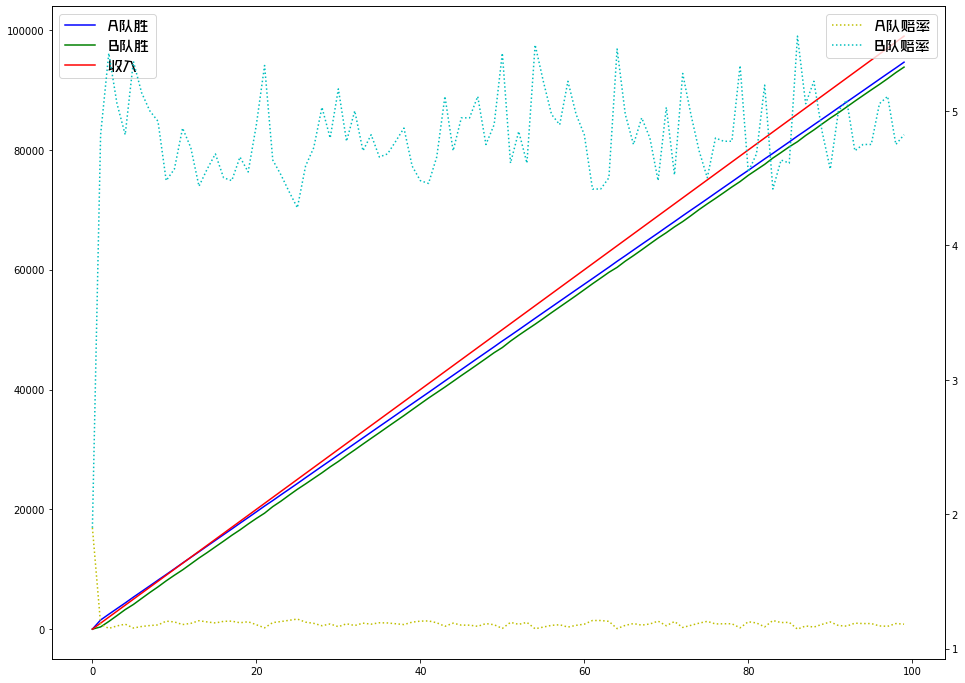

In [3]:
profit = 0.05  #预期收益
will_A = 0.8  #投注者的对A队的偏好
prob_A = 0.5  #A队初始预测胜率
amount = [0, 0]  #投注人数记录
amounts = []
prize = [0, 0]  #奖金额记录
prize_A = []
prize_B = []
odds_As = []  #A队赔率记录
odds_Bs = []  #B队赔率记录

odds_A = (1 - profit) / prob_A  #A队赔率
odds_B = (1 - profit) / (1 - prob_A)  #B队赔率

class Player():
    def __init__(self):
        global odds_A, odds_B
        if random.random() < will_A:
            self.bet_A = True
            self.odds = odds_A
            amount[0] += 1
            amounts.append(1)
        else:
            self.bet_A = False
            self.odds = odds_B
            amount[1] += 1
            amounts.append(2)

        if len(amounts) > 1000:
            # 赔率更新
            prob_A = amounts[-1000:].count(1) / len(amounts[-1000:])
            odds_A = (1 - profit) / prob_A
            odds_B = (1 - profit) / (1 - prob_A)


for i in range(100000):
    p = Player()
    if p.bet_A:
        prize[0] += p.odds
    else:
        prize[1] += p.odds
    odds_As.append(odds_A)
    odds_Bs.append(odds_B)
    
    # 每10000人降低A队偏好
#     if i > 0 and i % 10000 == 0:
#         will_A *= 0.9
#         print(will_A)

    # 万分之一概率偏好波动
#     if random.random() < 0.0001:
#         will_A = 0.05 + random.random() * 0.9
#         print(will_A)
        
    prize_A.append(prize[0])
    prize_B.append(prize[1])

# font = mpl.font_manager.FontProperties(fname='../zhaozi.ttf', size=15)  # 中文乱码问题

fig, ax1 = plt.subplots(figsize=(16, 12))
line1, = ax1.plot(prize_A[::1000], 'b')
line2, = ax1.plot(prize_B[::1000], 'g')
line3, = ax1.plot(range(0,100000,1000), 'r')
# ax1.legend(['A队胜', 'B队胜', '收入'], prop=font)
ax1.legend(['A队胜', 'B队胜', '收入'])

ax2 = ax1.twinx()
line4, = ax2.plot(odds_As[::1000], 'y:')
line5, = ax2.plot(odds_Bs[::1000], 'c:')
# ax2.legend(['A队赔率', 'B队赔率'], prop=font)
ax2.legend(['A队赔率', 'B队赔率'])

In [4]:
def match(count):
    global odds_A, odds_B
    profit = 0.05
    will_A = 0.5
    prob_A = 0.5
    amount = [0, 0]
    amounts = []
    prize = [0, 0]
    prize_A = []
    prize_B = []
    odds_As = []
    odds_Bs = []

    odds_A = (1 - profit) / prob_A
    odds_B = (1 - profit) / (1 - prob_A)

    class Player():
        def __init__(self):
            global odds_A, odds_B
            if random.random() < will_A:
                self.bet_A = True
                self.odds = odds_A
                amount[0] += 1
                amounts.append(1)
            else:
                self.bet_A = False
                self.odds = odds_B
                amount[1] += 1
                amounts.append(2)
            if len(amounts) > 1000:
                prob_A = amounts[-1000:].count(1) / len(amounts[-1000:])
                odds_A = (1 - profit) / prob_A
                odds_B = (1 - profit) / (1 - prob_A)

    for i in range(count):
        p = Player()
        if p.bet_A:
            prize[0] += p.odds
        else:
            prize[1] += p.odds
        odds_As.append(odds_A)
        odds_Bs.append(odds_B)
        if random.random() < 0.0001:
            will_A = 0.1 + random.random() * 0.8
        prize_A.append(prize[0])
        prize_B.append(prize[1])
    return prize[0] / count, prize[1] / count

result1 = []
result2 = []
# 计算100次收益比例
for i in range(100):
    a, b = match((i+10)*1000)
    result1.append(a)
    result2.append(b)
    print(i, a, b)


0 0.9510143914589889 0.950656820499961
1 0.9496574718193533 0.9517112995617668
2 0.9686277664043643 0.9240276509592862
3 0.9837882763902466 0.9530605042480121
4 0.9512979149298011 0.9504190804569006
5 0.9606726257416585 0.9471899713876079
6 0.9943638137889353 0.9321952516236305
7 0.9602716374183448 0.9442654153695901
8 0.9566972900599651 0.9454755752017657
9 0.9628847789854551 0.939274176346718
10 0.9344907074281041 0.9862646635375751
11 0.940926854252735 0.9593439112112295
12 0.9674628738140466 0.9492759429479602
13 0.9661597724903935 0.9674474875489865
14 0.9630323027939132 0.9284552445300979
15 0.9424455380933594 0.9682262946541732
16 0.9375558257460521 0.97376357465758
17 0.9467542326067312 0.9616113737458833
18 0.9534733240629342 0.9620340518658574
19 0.9614618049313846 0.9473305527683143
20 0.9590627717690628 0.9384869303097467
21 0.9487634619613241 0.9575361577319358
22 0.959841204499762 0.9618618827946699
23 0.9589344918136727 0.9462087329148132
24 0.9411406928100036 0.96172826

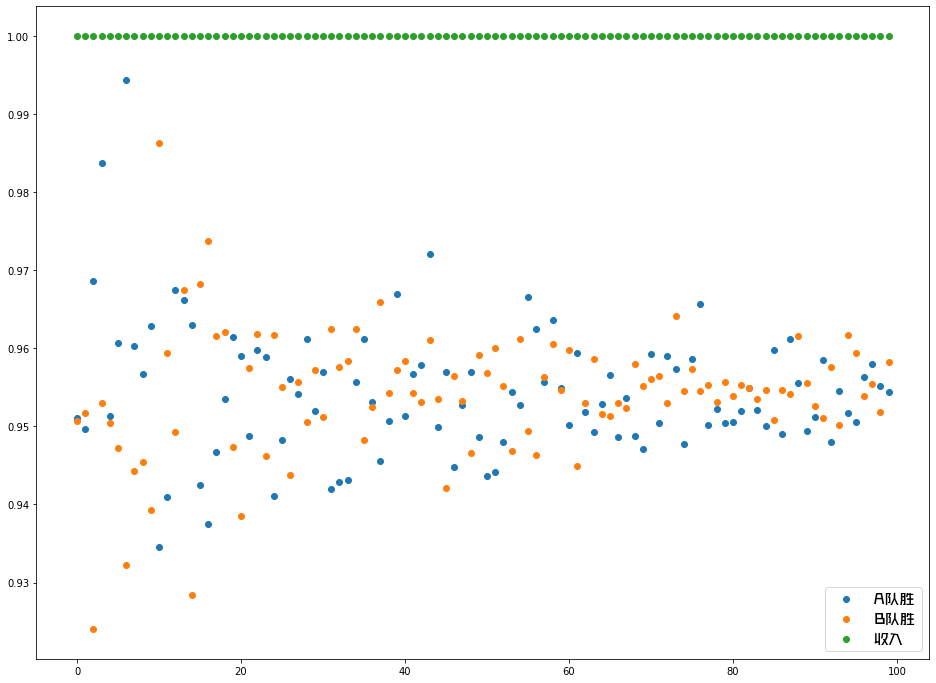

In [5]:
fig, ax1 = plt.subplots(figsize=(16, 12))
sca1 = ax1.scatter(range(100), result1)
sca2 = ax1.scatter(range(100), result2)
sca3 = ax1.scatter(range(100), [1]*100)

# ax1.legend(['A队胜', 'B队胜', '收入'], prop=font)
ax1.legend(['A队胜', 'B队胜', '收入'])

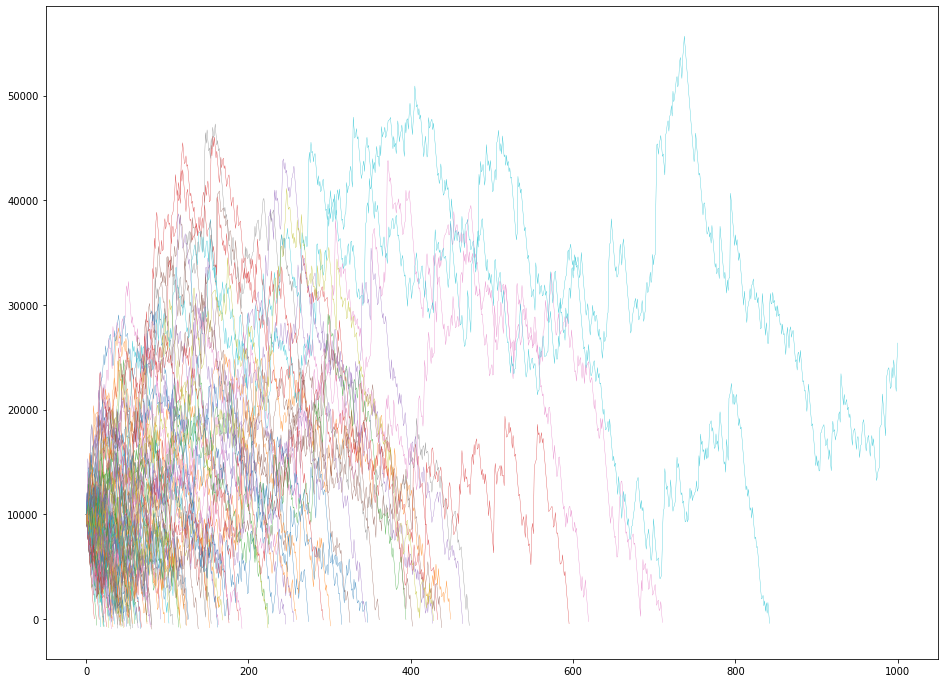

In [6]:
def bet(m):
    prob = 0.1 + random.random() * 0.8
    odds = (1 - profit) / prob
    b = 1000  # 每次 1000
#     b = money  # 每次 all-in  
    m -= b
    if random.random() < prob:
        return m + b * odds
    else:
        return m

profit = 0.05
plt.subplots(figsize=(16, 12))
for x in range(100):
    money = 10000
    moneys = [money]

    for i in range(1000):
        # 归零时跳出循环（不许借钱）
        if money < 1:
            break

        money = bet(money)
        moneys.append(money)
    plt.plot(moneys, lw=0.3)
